Dataset: Fashion MNIST. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [1]:
# !pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

Now, it's time to load the dataset

In [2]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [3]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

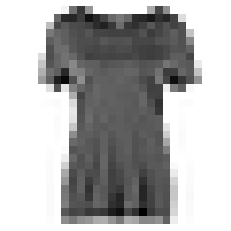

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [5]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

<h1 align='center' style="color: blue;">Task 1 </h1>

### I'd like to break down my work into separate phases for easier understanding, and I hope the same goes for the reader.

<h3 align='left' style="color: blue;">Phase 1: </h3>

   #### We implement the following approaches in phases; these methods help improve performance and scalability. 

> Faltten the Data : Converting multdimentional data to 1 dimentional.

> Normalize the data: Transforming numeric columns to a common scale.

> Apply PCA to reduce the number of columns in  the data. 

#### it is necessary to normalize data before performing PCA. The PCA calculates a new projection of your data set.

In [7]:
# Flatten the Data:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

In [8]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

In [9]:
# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

In [10]:
# Check shape of the data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [11]:
#Apply PCA to the model
from sklearn.decomposition import PCA
pca = PCA(n_components=125, whiten=True, random_state=0) 
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(60000, 125)

<h3 align='left' style="color: blue;">Phase 2: </h3>

#### I chose to run each of the following models on our dataset one by one, comparing accuracy, precession, recall, f1, and AUC to see which model performed best on our data.

> Logistic Regression

> AdaBoost Classifer

> GradientBoosting Classifer

> Random Forest

> Decesion Tree Classifier

> KNN Neighbors

> SVM 

####  To obtain the metrics, we can use a classification report or a cross-validation approach. To compare the results, I will use the cross validation method and the mean value of the metrics.

Note1: Rather than running all of the models in the same cell, I chose to run each model in a separate cell. Because the data set is large, running all algorithms in a single cell will take a long time. So I'll go through each one and interpret the metrics.

Note2: For testing purposes, we will slice the dataset into very small set to see if all of the models are running properly, and then run the models with full data. I will comment this approch later and run with original daataset.

In [13]:
# # Slice the dataset to small values set for temperory purpose
# X_train_cut = X_train[:200,:]
# X_test_cut = X_test[:200,:]
# y_train_cut = y_train[:200]
# y_test_cut = y_test[:200]

> Lets Start evaluating meterics for each model

## Logistic Regression

In general, The coefficient values are used in logistic regression to determine which features (i.e. which pixels) are relevant in deciding which class a sample belongs to.

In [14]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.linear_model import LogisticRegression

#Intialize the model
logreg_model = LogisticRegression(solver='liblinear')

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
scores = cross_validate(logreg_model,  X_train, y_train, scoring=scoring, cv=3, 
                        return_train_score=False)


print("Mean Score metrics for Logistic regression model are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))


Mean Score metrics for Logistic regression model are as follows:

fit_time : 7569.863319396973 
score_time : 21.99556827545166 
test_accuracy : 85.18333333333334 
test_precision : 85.00412430782698 
test_recall : 85.18333333333334 
test_f1 : 85.0362141545924 
test_AUC : 98.2109052777778 


## AdaBoost Classifer

Adaboost makes it possible to combine multiple "weak classifiers" into a single "strong classifier." The weak learners in AdaBoost are decision trees with a single split, called decision stumps. AdaBoost works by giving more weight to cases that are difficult to classify and less to those that are already well-classified.

In [15]:

from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.ensemble import AdaBoostClassifier

#Intialize the model - With out any hyperparameters
ABC_model = AdaBoostClassifier()

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
scores = cross_validate(ABC_model,  X_train, y_train, scoring=scoring, cv=3, 
                        return_train_score=False)


print("Mean Score metrics for AdaBoost Classifier model are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))


Mean Score metrics for AdaBoost Classifier model are as follows:

fit_time : 5949.566332499186 
score_time : 198.32712809244794 
test_accuracy : 47.19333333333333 
test_precision : 54.9238916873513 
test_recall : 47.19333333333333 
test_f1 : 43.45065695096619 
test_AUC : 83.94432203703703 


## GradientBoosting Classifer

Gradient Boositing Classifier is similar to AdaBoost Classifier, it combines many weak learning models to generate a powerful predictive model. When doing gradient boosting, decision trees are commonly used. 

In [16]:
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier

#Intialize the model - With out any hyperparameters
# GBC_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
GBC_model = GradientBoostingClassifier(n_estimators=500, random_state=0)

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
scores = cross_validate(GBC_model,  X_train, y_train, scoring=scoring, cv=3, 
                        return_train_score=False)


print("Mean Score metrics for GradientBoosting Classifier model are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))


Mean Score metrics for GradientBoosting Classifier model are as follows:

fit_time : 1636464.3921613693 
score_time : 4362.720855077108 
test_accuracy : 89.32166666666667 
test_precision : 89.28142973756518 
test_recall : 89.32166666666667 
test_f1 : 89.28575900314404 
test_AUC : 99.20168074074076 


## RandomForestClassifier

One issue with Decision Trees is their difficulty in generalizing a problem. The algorithm learns so well how to make decisions about a given dataset that when we apply it to new data, it fails to provide the best answer.
To address this issue, a new type of Decision Tree algorithm was developed by gathering many Trees trained on variations of the same dataset and combining them using a voting or average system to determine the best result for each data point. That is the Random Forest concept.

In [12]:
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.ensemble import RandomForestClassifier

#Intialize the model - With out any hyperparameters
RFC_model = RandomForestClassifier(n_estimators=500, random_state=20)

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
scores = cross_validate(RFC_model,  X_train, y_train, scoring=scoring, cv=3, 
                        return_train_score=False)


print("Mean Score metrics for Random Forest Classifier model are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Mean Score metrics for Random Forest Classifier model are as follows:

fit_time : 25920.984784762066 
score_time : 1062.2456947962442 
test_accuracy : 88.21833333333333 
test_precision : 88.126660980936 
test_recall : 88.21833333333333 
test_f1 : 88.06575471991086 
test_AUC : 99.08580310185185 


## Decesion Tree Classifier

Decision Tree is a problem-solving algorithm that is widely used. It attempts to simulate the human decision-making process by binarizing each step of the decision-making process. As a result, at each step, the algorithm chooses between True and False in order to proceed. That algorithm is simple but extremely powerful, and it is widely used in machine learning models.

In [18]:
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Intialize the model - Using GridSearchCV to find the max_depth hyperparameters
DC_model = DecisionTreeClassifier()
param_grid = {'max_depth': [2,3,4,5,6,7]}
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
grid = GridSearchCV(DC_model, param_grid, cv = cv, 
                    return_train_score=True, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))


#Run Best Estimator model
bestModel = grid.best_estimator_

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
#scores for best estimator model
scores = cross_validate(bestModel,  X_train, y_train, scoring=scoring, cv=3, 
                        return_train_score=False)


print("Mean Score metrics for Decesion Tree Classifier model are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Best Parameter: {'max_depth': 7}
Best Cross Vlidation Score: 0.7580666666666667
Mean Score metrics for Decesion Tree Classifier model are as follows:

fit_time : 746.0683266321819 
score_time : 8.604979515075684 
test_accuracy : 76.30333333333333 
test_precision : 76.78197247884454 
test_recall : 76.30333333333333 
test_f1 : 76.23210891892938 
test_AUC : 96.05002379629632 


## KNN Neighbors

By far the simplest image classification algorithm is the k-Nearest Neighbor classifier. It's so easy, in fact, that it doesn't really "learn" anything! Instead, this approach depends on the distance between feature vectors, similar to how an image search engine works, except we have labels connected with each image, allowing us to predict and return an actual category for the image.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Intialize the model - Using GridSearchCV to find the n_neighnors hyperparameters
KNN_model = KNeighborsClassifier()

param_grid = {'n_neighbors': [1,2,3,4,5,6]}
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=False)
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))


#Run Best Estimator model
bestModel = grid.best_estimator_

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
#scores for best estimator model
scores = cross_validate(bestModel,  X_train, y_train, scoring=scoring, cv=3, 
                        return_train_score=False)


print("Mean Score metrics for KNN Neighbors are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Best Parameter: {'n_neighbors': 4}
Best Cross Vlidation Score: 0.85385
Mean Score metrics for KNN Neighbors are as follows:

fit_time : 8.420920372009277 
score_time : 5864.278769493103 
test_accuracy : 85.22666666666666 
test_precision : 85.48710584703193 
test_recall : 85.22666666666666 
test_f1 : 85.08221636140499 
test_AUC : 96.39818287037038 


## SVM

SVM creates a hyperplane in multidimensional space to separate different classes. The primary goal is to segregate the given dataset as best as possible. The margin is the distance between the two closest points. The goal is to find a hyperplane with the greatest possible margin between support vectors in the given dataset. SVM seeks the most marginal hyperplane.

In [ ]:
# Let's apply grid search with cross validation to find the best value for C and gamma
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
import numpy as np


#Intialize the model - Using GridSearchCV to find the best C and gamma hyperparameters
svc_model = SVC(kernel='rbf', class_weight='balanced', probability=True)

param_grid = {'C': [.1, 1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc_model, param_grid, cv = 10, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))


#Run Best Estimator model
bestModel = grid.best_estimator_

#Apply Cross Validation to get the performance metrics of the model
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }
#scores for best estimator model
scores = cross_validate(bestModel,  X_train, y_train, scoring=scoring, cv=3, 
                        return_train_score=False, error_score="raise")


print("Mean Score metrics for SVM are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

When I first trained all the models with small data sets of 200 images to predict my own images, SVM outperformed all other models with the highest performance scores and accurately predicted four labels out of five images (80% accuracy). On that basis, I expected that when I train the model with 60,000 images, the SVM would perform similarly or even better. However, SVM takes an excessive amount of time to train the model. I attempted to execute the module on various GPU-capable laptops, but the systems encountered blue screen issues and were forced to restart. I'm still running the model, and SVM is still running after nearly 5 days. I and my laptop apologize for not being able to provide the result of SVM.

### Here's come the hardest part to find out, which model that outperforms the other models?

In general, while evaluating a model, I look for the f1 mean performance scores and AUC. The models' performance improves as the values increase. On that premise, I can rule out the Adaboost and Decesion trees classifiers, which have the lowest scores. The scores for the other modules were comparable, and they performed similarly. Gradient Boosting Classifier and Random Forest Classifier rank first and second, respectively, in terms of f1 and AUC.

Fit time and score time are two extra scores I've taken into account in all of my models. I took these scores with the intention of keeping track of how long it takes a model to train and test data. I believe that time is an issue as well, because in a real-world scenario, the time it takes to run the model is exactly proportional to the amount of money spent ( expensiveness of the model).

I'm aware that models can run quicker in environments with more computing power and better hyperparameters, and I believe that a model like SVM may produce superior results. However, in my environment, the Gradient Boosting classifier with higher scores has ran for 16 hours (which is costly), whilst the Random forest with equal scores (Very Minimal Difference in Scores) has just run for 30 minutes and projected the results.  

As a result, in my case, the Random Forest Classifier is the best model.

<h3 align='left' style="color: blue;">Phase 3: </h3>

#### In phase 3, we'll make predictions on new test data using our best-performing model, Random Forest.
#### At the end, we can see the classification report, which includes accuracy, precision, recall, and f1 scores for each class lable.

In [15]:
#Prediction on new test data using best model RFC
RFC_model.fit(X_train, y_train)
y_test_hat = RFC_model.predict(X_test)

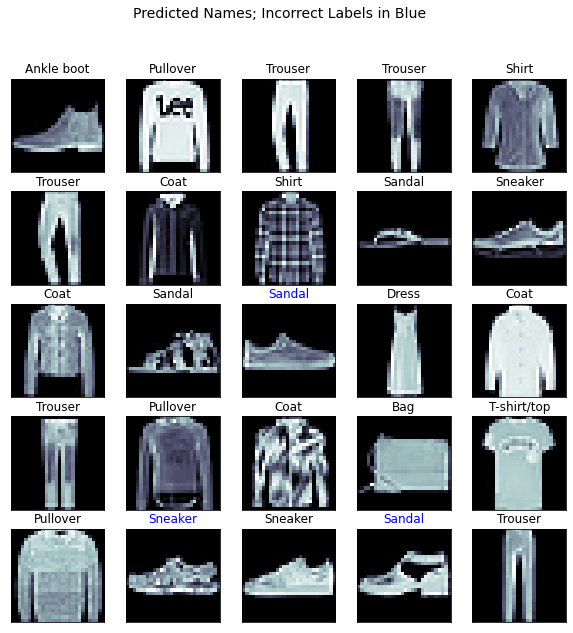

In [16]:
# Plot the prediction graph

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(28, 28), cmap='bone')
    axi.set_title(class_names[y_test_hat[i]], 
                  color='black' if y_test_hat[i] == y_test[i] else 'blue')
    axi.set(xticks=[], yticks=[])
    
fig.suptitle('Predicted Names; Incorrect Labels in Blue', size=14);

In [17]:
# Classification report of Actual and predicted results.

from sklearn.metrics import classification_report 
print(classification_report(y_test, y_test_hat, 
                            target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.80      0.78      1000
       Dress       0.88      0.91      0.89      1000
        Coat       0.78      0.82      0.80      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.59      0.64      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



<h1 align='center' style="color: blue;">Task 2 </h1>

The six steps to completing Task 2 are listed below. 

1. Take a picture of five fashion pieces of your own (take pictures in square format).
2. Resize images to the correct size (28,28).
3. Grayscale your images.
4. Visualize all the images side by side
5. Use the best model in Task 1 to predict the label of each of your own images.
6. How accurate is the final result?

## Step 1: Arrange the five original-dimension fashion pieces side by side.

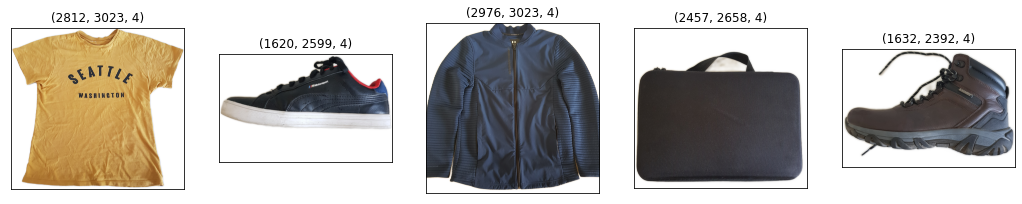

In [18]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

#Images
img1 = np.array(mpimg.imread('Tshirt1.png'))
img2 = np.array(mpimg.imread('sneakers1.png'))
img3 = np.array(mpimg.imread('coat1.png'))
img4 = np.array(mpimg.imread('bag1.png'))
img5 = np.array(mpimg.imread('Ankleboot1.png'))

#Images list
images = [img1,img2,img3,img4,img5]

#Plot images with their shapes as label
fig, ax = plt.subplots(1, 5, figsize=(18, 16)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i]) 
    axi.set_title(images[i].shape) 
    axi.set(xticks=[], yticks=[])


## Step 2: Resize images to the correct size (28,28).

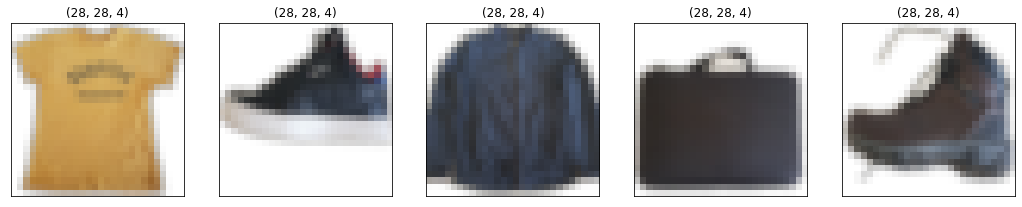

In [19]:
#Resize images to 28X28 and Plot images with their shapes as label
from skimage.transform import resize

#Resize images
r_img1 = resize(img1, (28,28))
r_img2 = resize(img2, (28,28))
r_img3 = resize(img3, (28,28))
r_img4 = resize(img4, (28,28))
r_img5 = resize(img5, (28,28))

#Resize image list
Resized_images = [r_img1,r_img2,r_img3,r_img4,r_img5]

fig, ax = plt.subplots(1, 5, figsize=(18, 16)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(Resized_images[i], cmap = 'binary') 
    axi.set_title(Resized_images[i].shape) 
    axi.set(xticks=[], yticks=[])


## Size 3: Grayscale your images.

In [20]:
#Gray Scale images
Gray_img1 = r_img1.mean(axis = 2)
Gray_img2 = r_img2.mean(axis = 2)
Gray_img3 = r_img3.mean(axis = 2)
Gray_img4 = r_img4.mean(axis = 2)
Gray_img5 = r_img5.mean(axis = 2)


## Step 4: Visualize all the images side by side

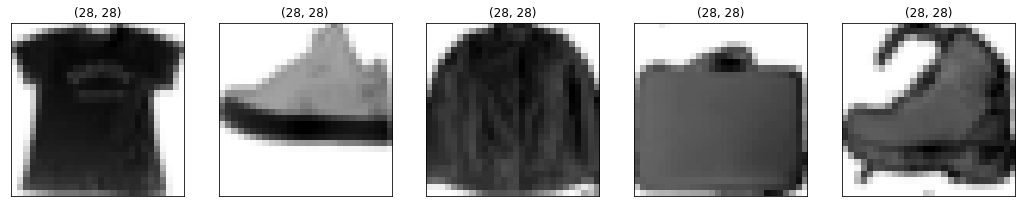

In [21]:
#Gray scale image list
Gray_images = [Gray_img1,Gray_img2,Gray_img3,Gray_img4,Gray_img5]

fig, ax = plt.subplots(1, 5, figsize=(18, 16)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(Gray_images[i], cmap = 'binary') 
    axi.set_title(Gray_images[i].shape) 
    axi.set(xticks=[], yticks=[])

## Step 5: Use the best model in Task 1 to predict the label of each of your own images.

In [22]:
# Flatenening the data
X_data = np.array(Gray_images)
X_data = X_data.reshape(5, 784)

In [23]:
#Using the best model
y_test_hat = RFC_model.predict(X_data)

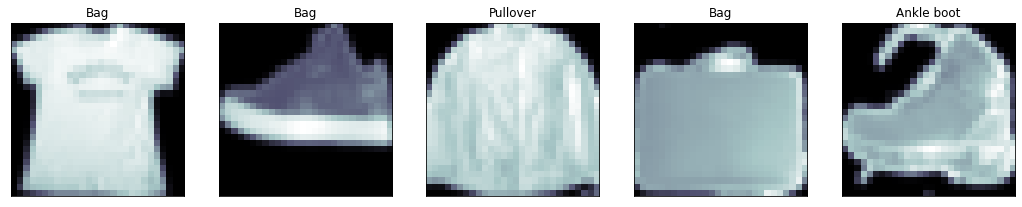

In [26]:
#Plot the prediction results
fig, ax = plt.subplots(1, 5, figsize=(18, 16))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_data[i].reshape(28, 28), cmap='bone')
    axi.set_title(class_names[y_test_hat[i]])
    axi.set(xticks=[], yticks=[])
# fig.suptitle('Predictions', size=14);

## Step 6: How accurate is the final result?

The formula calculates the accuracy of the predictions:

<div style='text-align:center; font-size:12pt'>$ Accuracy = \frac{\text{# true predicted cases}}{\text{#total cases}} \times 100 $</div
    
    Accuracy = (3)/(5) * 100
    Accuracy = 60%
  
 The final result is 60% accurate

Random forest appears to be underperforming on new test data.

### Conclusion:
The accuracy of the models can be improving the quality and clarity of the pictures. Need to work on image quality while flatening and grey scaling the images.